In [1]:
pip install plotly-calplot

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install calmap

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import glob
import calmap
from plotly_calplot import calplot

In [53]:
df = pd.read_csv('Combined_Flights_2021.csv')
print(df.head(5))

   FlightDate                Airline Origin Dest  Cancelled  Diverted  \
0  2021-03-03  SkyWest Airlines Inc.    SGU  PHX      False     False   
1  2021-03-03  SkyWest Airlines Inc.    PHX  SGU      False     False   
2  2021-03-03  SkyWest Airlines Inc.    MHT  ORD      False     False   
3  2021-03-03  SkyWest Airlines Inc.    DFW  TRI      False     False   
4  2021-03-03  SkyWest Airlines Inc.    PHX  BFL      False     False   

   CRSDepTime  DepTime  DepDelayMinutes  DepDelay  ...  WheelsOff  WheelsOn  \
0         724    714.0              0.0     -10.0  ...      724.0     813.0   
1         922    917.0              0.0      -5.0  ...      940.0    1028.0   
2        1330   1321.0              0.0      -9.0  ...     1336.0    1445.0   
3        1645   1636.0              0.0      -9.0  ...     1703.0    1955.0   
4        1844   1838.0              0.0      -6.0  ...     1851.0    1900.0   

   TaxiIn  CRSArrTime  ArrDelay  ArrDel15  ArrivalDelayGroups  ArrTimeBlk  \
0     5.0

In [54]:
print(df.describe()) 

         CRSDepTime       DepTime  DepDelayMinutes      DepDelay  \
count  6.311871e+06  6.203546e+06     6.203458e+06  6.203458e+06   
mean   1.323953e+03  1.326878e+03     1.276132e+01  9.468347e+00   
std    4.741972e+02  4.868330e+02     4.736319e+01  4.837844e+01   
min    1.000000e+00  1.000000e+00     0.000000e+00 -1.050000e+02   
25%    9.200000e+02  9.230000e+02     0.000000e+00 -6.000000e+00   
50%    1.315000e+03  1.321000e+03     0.000000e+00 -2.000000e+00   
75%    1.723000e+03  1.729000e+03     6.000000e+00  6.000000e+00   
max    2.359000e+03  2.400000e+03     3.095000e+03  3.095000e+03   

            ArrTime  ArrDelayMinutes       AirTime  CRSElapsedTime  \
count  6.199463e+06     6.185870e+06  6.185870e+06    6.311870e+06   
mean   1.476758e+03     1.252928e+01  1.105702e+02    1.405049e+02   
std    5.137709e+02     4.674770e+01  6.888632e+01    7.031368e+01   
min    1.000000e+00     0.000000e+00  8.000000e+00   -2.920000e+02   
25%    1.105000e+03     0.000000e+00 

In [55]:
print(df.dtypes)

FlightDate             object
Airline                object
Origin                 object
Dest                   object
Cancelled                bool
                       ...   
ArrDel15              float64
ArrivalDelayGroups    float64
ArrTimeBlk             object
DistanceGroup           int64
DivAirportLandings    float64
Length: 61, dtype: object


In [56]:
df['Airline'].value_counts() #most flights

Airline
Southwest Airlines Co.                       1064640
SkyWest Airlines Inc.                         753343
Delta Air Lines Inc.                          747998
American Airlines Inc.                        736399
United Air Lines Inc.                         446837
Republic Airlines                             332926
Endeavor Air Inc.                             266867
Envoy Air                                     255751
Comair Inc.                                   222602
JetBlue Airways                               202702
Spirit Air Lines                              191361
Alaska Airlines Inc.                          188955
Mesa Airlines Inc.                            159789
Frontier Airlines Inc.                        137142
Allegiant Air                                 115881
Horizon Air                                   111628
Capital Cargo International                    99331
Air Wisconsin Airlines Corp                    80256
Commutair Aka Champlain Enterprises, I

<Axes: title={'center': 'Flight Delay (Minutes)'}, ylabel='Frequency'>

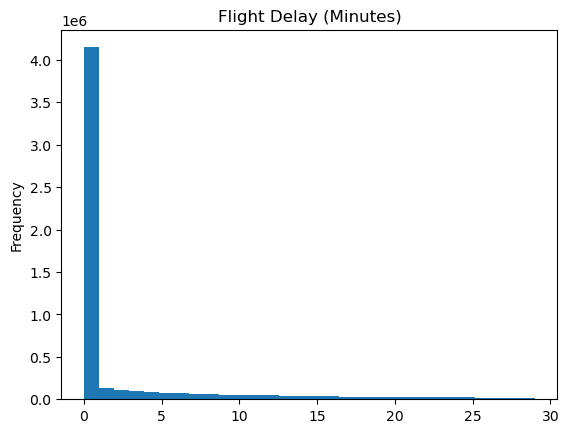

In [57]:
df.query('DepDelayMinutes < 30')['DepDelayMinutes'].plot(kind='hist', bins=30,
                                                        title='Flight Delay (Minutes)')

<Axes: title={'center': 'Flight Delay (Minutes)'}, ylabel='Frequency'>

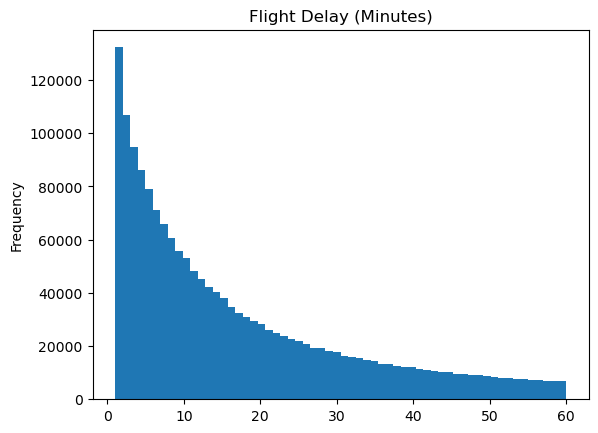

In [58]:
df.query('(DepDelayMinutes > 0) and (DepDelayMinutes < 61)')['DepDelayMinutes'].plot(kind='hist', bins=60,
                                                                                     title='Flight Delay (Minutes)')

In [59]:
df['DelayGroup'] = None
df.loc[df['DepDelayMinutes'] == 0, 'DelayGroup'] = 'OnTime_Early'
df.loc[(df['DepDelayMinutes'] > 0) & (df['DepDelayMinutes'] <= 15), 'DelayGroup'] = 'Small_Delay'
df.loc[(df['DepDelayMinutes'] > 15) & (df['DepDelayMinutes'] <= 45), 'DelayGroup'] = 'Medium_Delay'
df.loc[df['DepDelayMinutes'] > 45, 'DelayGroup'] = 'Large_Delay'
df.loc[df['Cancelled'], 'DelayGroup'] = 'Cancelled'

In [60]:
df.head()

,FlightDate,Airline,Origin,Dest,Cancelled,Diverted,CRSDepTime,DepTime,DepDelayMinutes,DepDelay,...,WheelsOn,TaxiIn,CRSArrTime,ArrDelay,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,DistanceGroup,DivAirportLandings,DelayGroup
0,2021-03-03,SkyWest Airlines Inc.,SGU,PHX,False,False,724,714.0,0.0,-10.0,...,813.0,5.0,843,-25.0,0.0,-2.0,0800-0859,2,0.0,OnTime_Early
1,2021-03-03,SkyWest Airlines Inc.,PHX,SGU,False,False,922,917.0,0.0,-5.0,...,1028.0,3.0,1040,-9.0,0.0,-1.0,1000-1059,2,0.0,OnTime_Early
2,2021-03-03,SkyWest Airlines Inc.,MHT,ORD,False,False,1330,1321.0,0.0,-9.0,...,1445.0,16.0,1530,-29.0,0.0,-2.0,1500-1559,4,0.0,OnTime_Early
3,2021-03-03,SkyWest Airlines Inc.,DFW,TRI,False,False,1645,1636.0,0.0,-9.0,...,1955.0,7.0,2010,-8.0,0.0,-1.0,2000-2059,4,0.0,OnTime_Early
4,2021-03-03,SkyWest Airlines Inc.,PHX,BFL,False,False,1844,1838.0,0.0,-6.0,...,1900.0,3.0,1925,-22.0,0.0,-2.0,1900-1959,2,0.0,OnTime_Early


In [61]:
print(df['Cancelled'].value_counts())
print('Percent Cancelled :', round(sum(df['Cancelled'] == True) / len(df['Cancelled']) * 100, 2), '% of all flights')

Cancelled
False    6200853
True      111018
Name: count, dtype: int64
Percent Cancelled : 1.76 % of all flights


In [62]:
print(df['Diverted'].value_counts())
print('Percent Diverted :', round(sum(df['Diverted'] == True) / len(df['Diverted']) * 100, 2), '% of all flights') 

Diverted
False    6296889
True       14982
Name: count, dtype: int64
Percent Diverted : 0.24 % of all flights


In [63]:
df['DelayGroup'].value_counts()

DelayGroup
OnTime_Early    4146782
Small_Delay     1019071
Medium_Delay     562885
Large_Delay      472115
Cancelled        111018
Name: count, dtype: int64

In [64]:
pal = sns.color_palette()

<Axes: title={'center': 'Delay Category'}, ylabel='DelayGroup'>

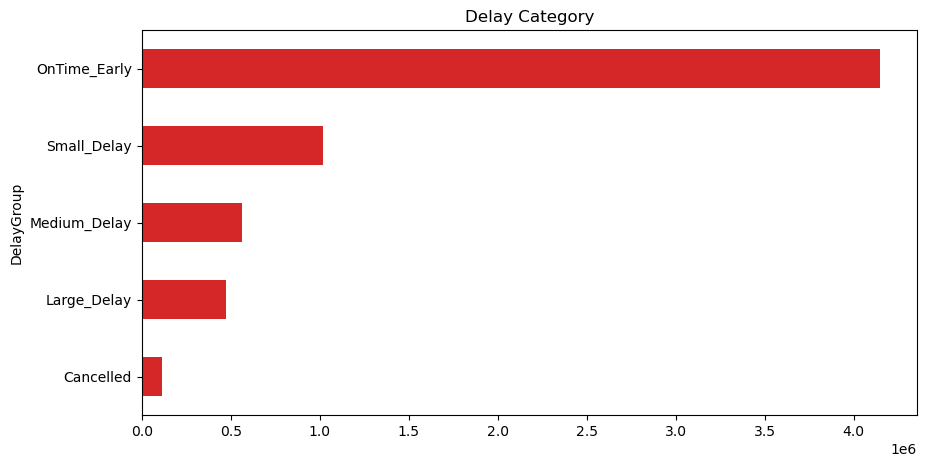

In [65]:
df['DelayGroup'].value_counts(ascending=True).plot(kind='barh', color=pal[3], title='Delay Category', figsize=(10,5))

In [66]:
print((df['DelayGroup'].value_counts() / df.shape[0] * 100).round(2))
print(sum(df['DelayGroup'].value_counts() / df.shape[0] * 100))

DelayGroup
OnTime_Early    65.70
Small_Delay     16.15
Medium_Delay     8.92
Large_Delay      7.48
Cancelled        1.76
Name: count, dtype: float64
100.0


In [67]:
df['DelayGroup'].value_counts(normalize=True) * 100 # normalize to return proportions rather than frequencies.

DelayGroup
OnTime_Early    65.698142
Small_Delay     16.145308
Medium_Delay     8.917879
Large_Delay      7.479795
Cancelled        1.758876
Name: proportion, dtype: float64

Text(0.5, 0.98, 'Delay Groups')

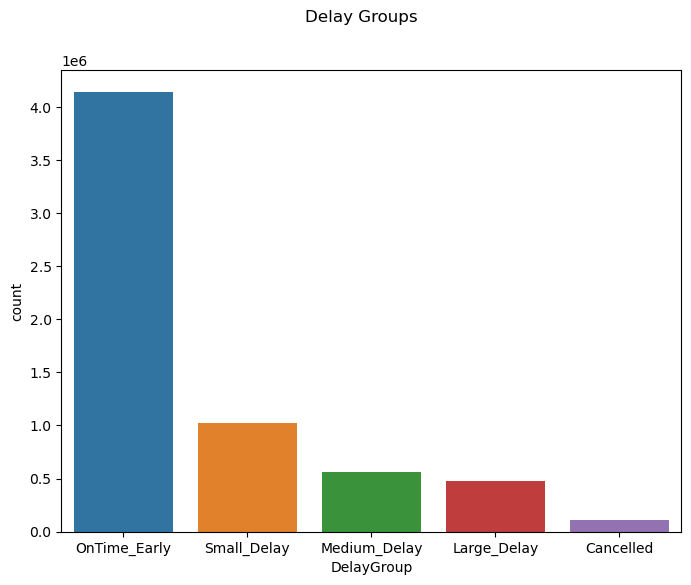

In [68]:
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='DelayGroup')
plt.suptitle('Delay Groups')

In [69]:
df['FlightDate'] = pd.to_datetime(df['FlightDate']) # Original as object.

In [70]:
df['FlightDate'].describe()

count                          6311871
mean     2021-07-15 12:56:53.561021696
min                2021-01-01 00:00:00
25%                2021-04-25 00:00:00
50%                2021-07-20 00:00:00
75%                2021-10-10 00:00:00
max                2021-12-31 00:00:00
Name: FlightDate, dtype: object

In [71]:
df['Month'] = df['FlightDate'].dt.month  # Extract the months.

In [72]:
df_agg = df.groupby('Month')['DelayGroup'].value_counts(normalize=True).unstack() * 100 # Grouping by month and unstacking the delay group
col_order = ['OnTime_Early','Small_Delay','Medium_Delay','Large_Delay','Cancelled'] # resorting the columns.
df_agg[col_order].style.background_gradient(cmap='Blues')

DelayGroup,OnTime_Early,Small_Delay,Medium_Delay,Large_Delay,Cancelled
Month,,,,,
1,81.567225,9.223900,4.365234,3.748445,1.095196
2,71.984179,11.465288,5.820601,4.961019,5.768912
3,76.596250,12.648622,5.586715,3.904514,1.263899
4,75.990640,13.377545,5.842983,4.248464,0.540368
5,70.696594,15.897427,7.280520,5.673587,0.451872
6,56.978209,18.452226,11.608651,11.358206,1.602708
7,55.117971,19.270492,12.124190,11.831516,1.655831
8,57.923872,17.456917,11.135187,10.420380,3.063644
9,69.675269,15.289233,7.738116,5.928165,1.369217


<Axes: >

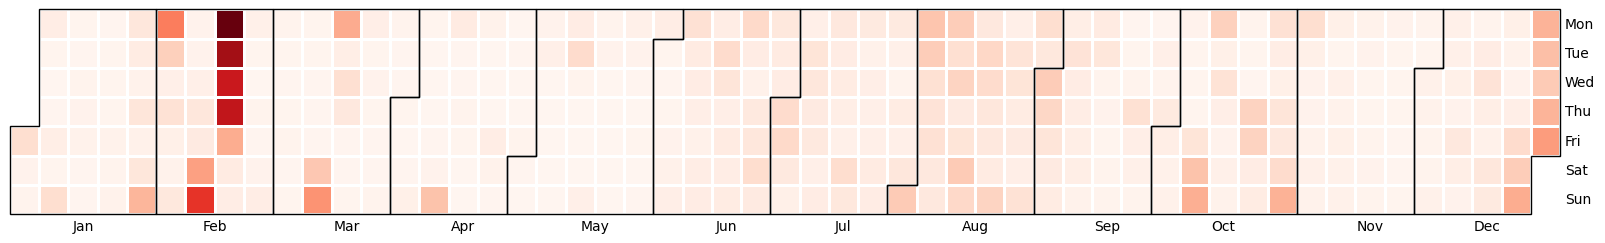

In [74]:
events = df.groupby('FlightDate')['Cancelled'].mean()
fig, ax = plt.subplots(figsize=(20,10))
calmap.yearplot(events, year=2021, monthly_border=True)

Text(0.4, 0.9, 'US Flight Cancellations')

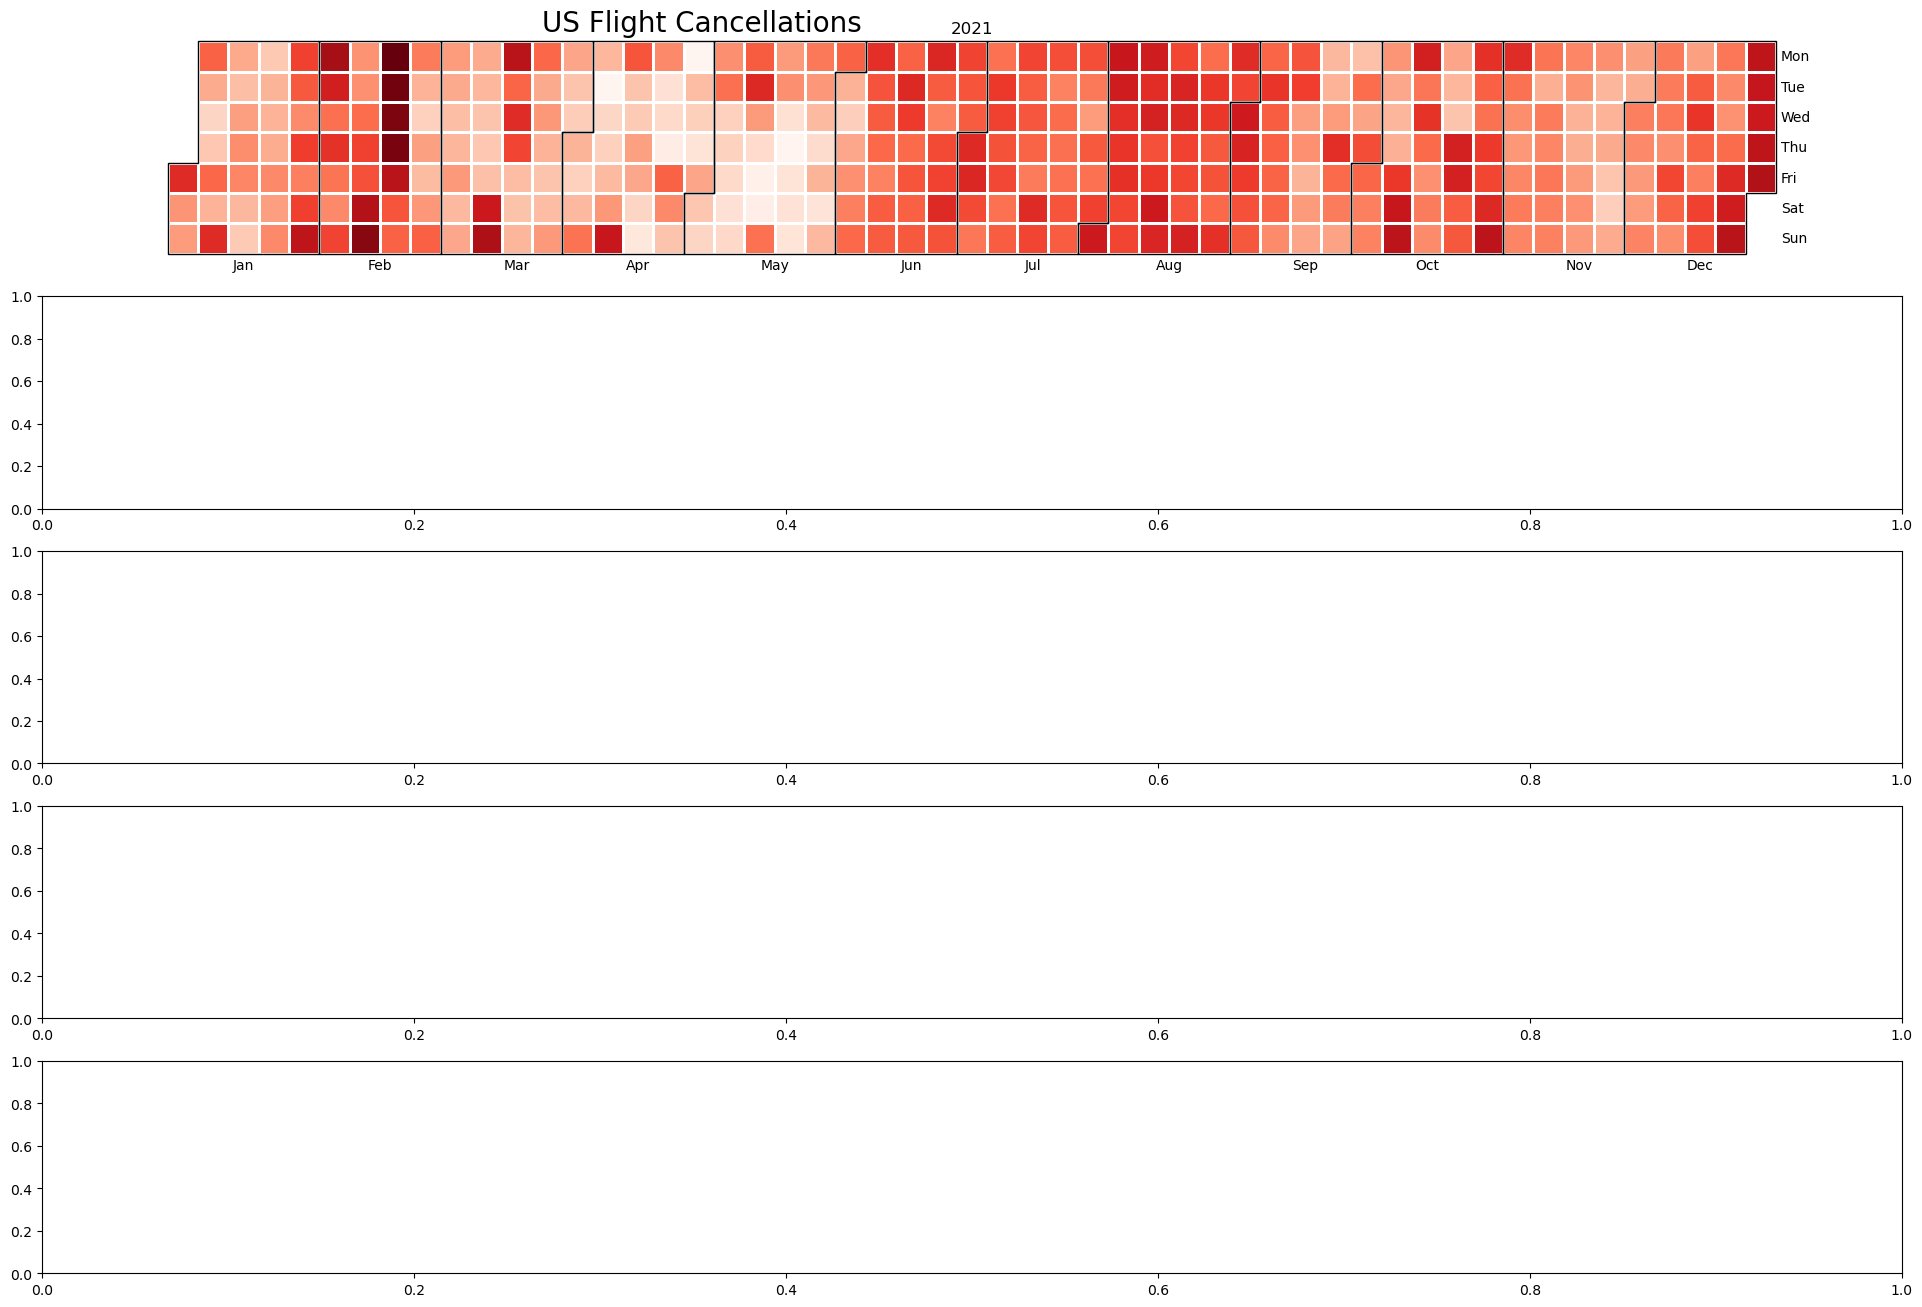

In [75]:
fig, axs = plt.subplots(5, 1, figsize=(24,16))  # 5 rowa 1 column
for i, year in enumerate([2021]): # -- for the full set  in case loaded. 
    calmap.yearplot(events.apply(np.log), year=year, monthly_border=True, ax=axs[i])
    axs[i].set_title(year)
fig.suptitle('US Flight Cancellations', x= 0.4, y=0.9, fontsize=20)

In [76]:
fig = calplot(events.reset_index(), x='FlightDate', dark_theme=True, y='Cancelled', title='US Flight Cancellations')
fig.show()

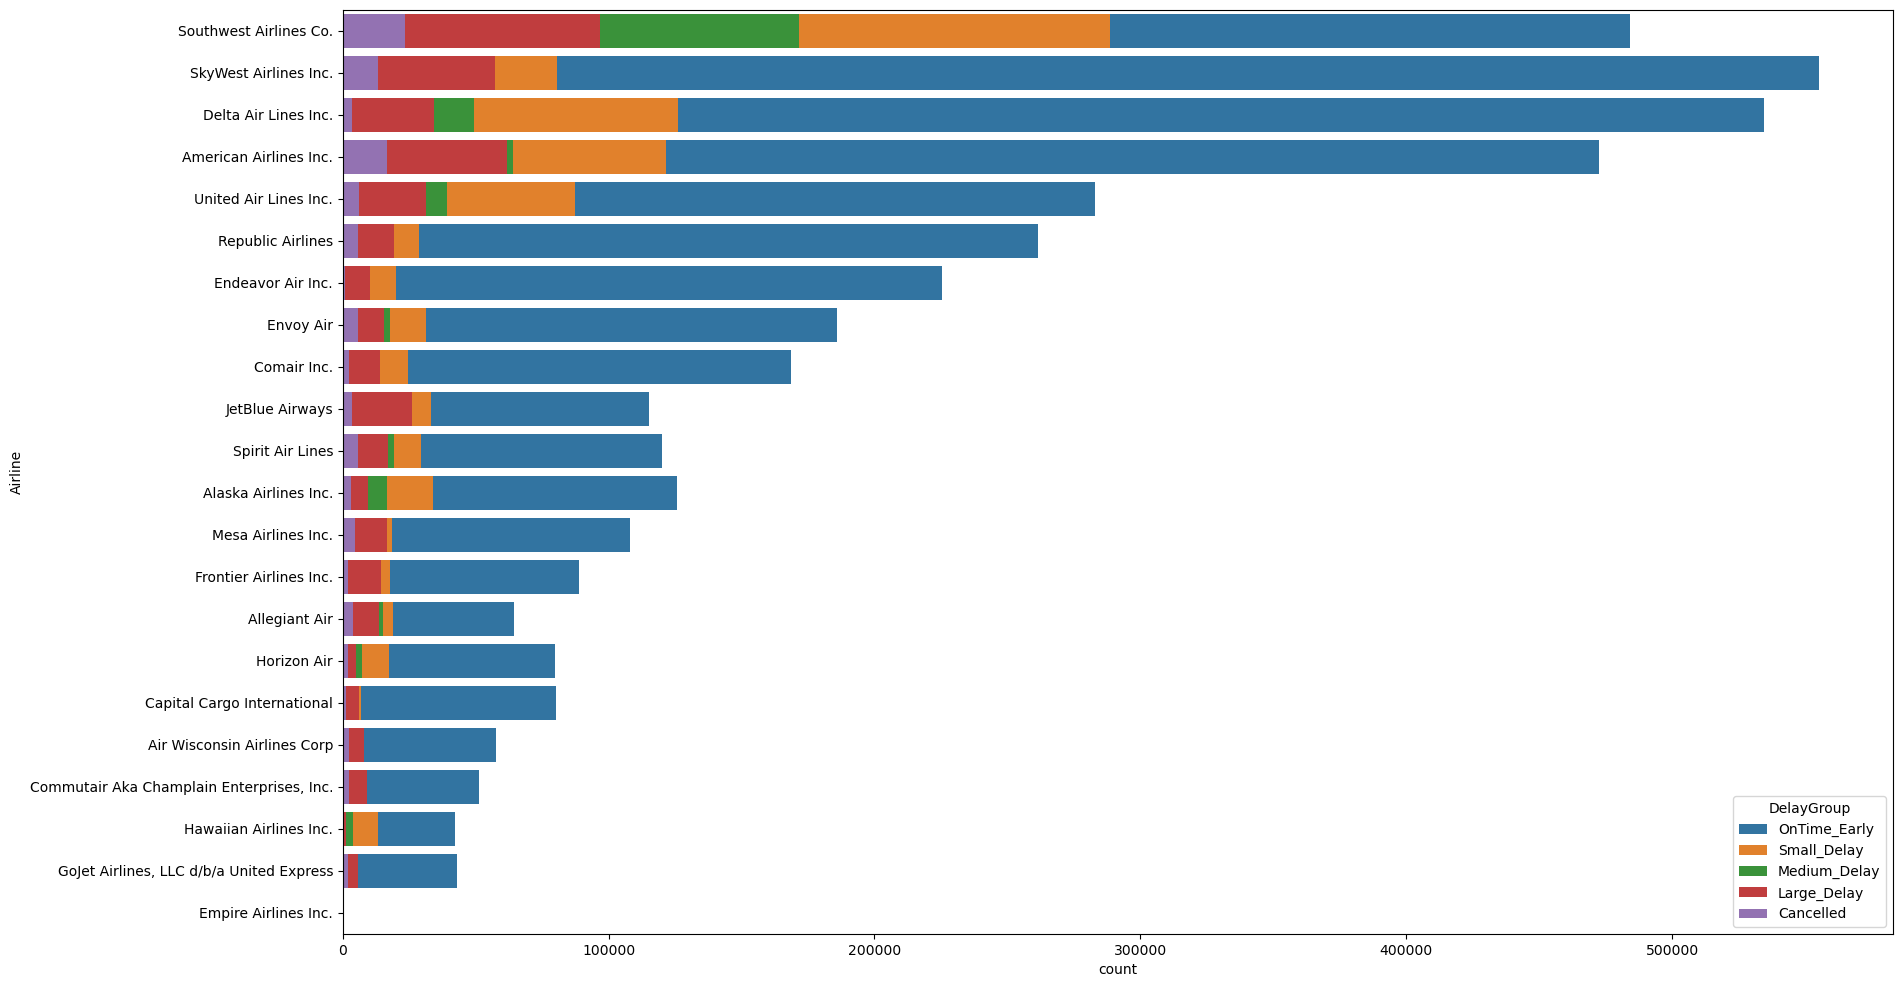

In [77]:
# Delay categories per Airline.
plt.figure(figsize=(20,12))
airline_order = df['Airline'].value_counts().index.tolist()
sns.countplot(data=df, y='Airline', order=airline_order, hue='DelayGroup', dodge=False)
plt.show()

In [78]:
df['Tail_Number'].nunique()

5785

In [79]:
df[df['DelayGroup'] != 'OnTime_Early']['Tail_Number'].value_counts().head(10)

Tail_Number
N8549Z    1040
N8678E    1015
N8655D    1014
N8569Z    1012
N8641B    1011
N8539V    1010
N8630B    1008
N8544Z    1006
N923WN    1005
N8648A    1002
Name: count, dtype: int64